# WordCloud Vizualization

Author Brian Tam, 10/24/2020

- create word clouds of the aggregated words used in each MBTI 
- create word clouds for each of the topics during topic modeling

In [16]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import numpy as np

# WordCloud generator and matplotlib to plot
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
# Postgres info to connect
connection = pg.connect(**{
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'myers_briggs'})    # DB that we are connecting to

query = "SELECT type, clean_post FROM cleaned_posts;"

df = pd.read_sql(query, connection)
df

,type,clean_post
0,INFJ,life change experience life perc experience im...
1,ENTP,find lack post alarming sex boring position ex...
2,INTP,course know blessing curse absolutely positive...
3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,ENTJ,fire silly misconception approach logically ke...
...,...,...
8670,ENTP,think generally people experience post trauma ...
8671,INTJ,planned stress relieve activity work day guy ...
8672,INFJ,sure method pick infj musical artist throw cau...
8673,ISFP,especially website haven neo nazis perc nerd l...


In [18]:
list(df.type.unique())

['INFJ',
 'ENTP',
 'INTP',
 'INTJ',
 'ENTJ',
 'ENFJ',
 'INFP',
 'ENFP',
 'ISFP',
 'ISTP',
 'ISFJ',
 'ESFP',
 'ISTJ',
 'ESTP',
 'ESTJ',
 'ESFJ']

In [24]:
def makeCloud(mb):
    text = df[df.type == mb].clean_post.str.cat(sep=' ')
    # Generate a word cloud image
    wordcloud = WordCloud(width = 1000, height = 1000,
                    background_color ='white',
                    min_font_size = 20,
                    stopwords = ['ENFP','INTJ','think','know']).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'word_clouds/{mb}.png',bbox_inches = 'tight', pad_inches = .25)
    plt.show()

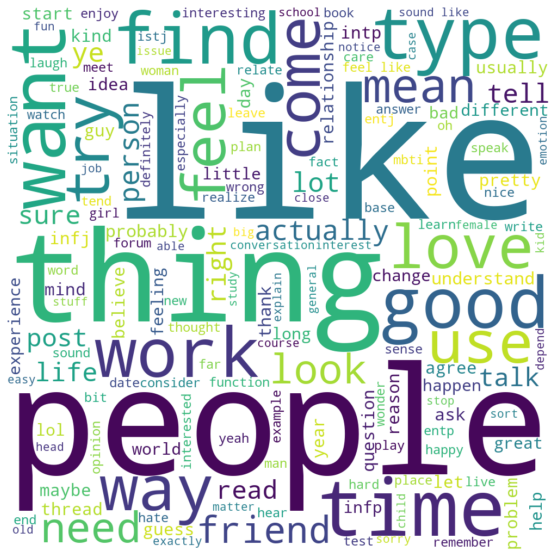

In [26]:
makeCloud('INTJ')

In [ ]:
df[df.type == 'ENFP'].clean_post.str.cat(sep=' ')

In [191]:
mb_dict = {}
for mb in list(df.type.unique()):
    mb_dict[mb]= df[df.type == mb].clean_post
    
type_df = pd.DataFrame(mb_dict)

In [192]:
mb_dict['ENFP']

17      hey enfps post thread philosophy board curious...
30      want trip stay option think believe unreasonab...
72       brother far right  infj lot love similar frig...
108     story feel bit right habit long  mile bike rid...
111     learn right way great talent cultivate good lu...
                              ...                        
8637    true think friend zone acquaintance particular...
8646    thank look forward connect forum like change l...
8649    seriously relate struggle big hurdle come appr...
8662    leoni bad social anxiety medicine huge advocat...
8674    ooop  guess look hard start movies enfp watch ...
Name: clean_post, Length: 675, dtype: object

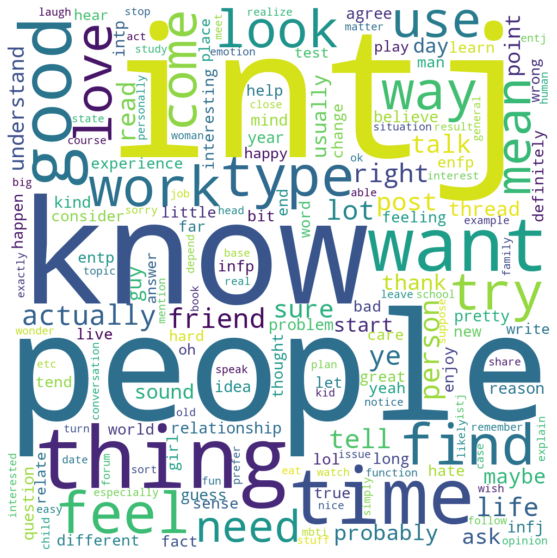

In [193]:
makeCloud('INTJ')

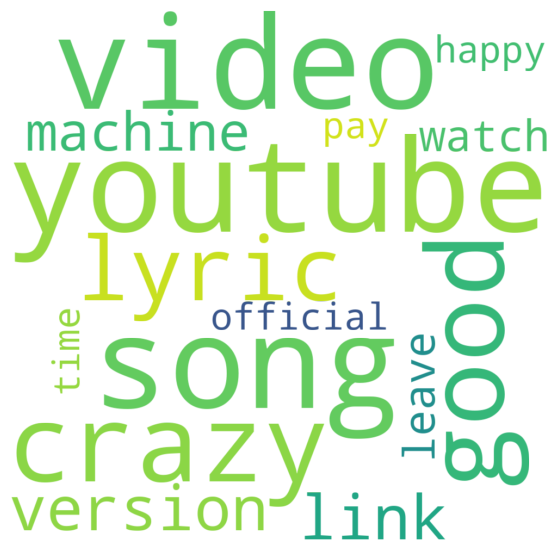

In [7]:
text = 'youtube, song, video, crazy, good, lyric, version, link, machine, watch, leave, official, time, happy, pay'
topic = f'topic {text.split()[0:2]}'

# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ="rgba(255, 255, 255, 0)", mode="RGBA",
                min_font_size = 20,
                stopwords = []).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(f'word_clouds/{topic}.png',bbox_inches = 'tight', pad_inches = .25)
plt.show()